#Limpeza e Análise de Dados

##Importação das Bibliotecas e criação do DataFrame

Iniciei importando as bibliotecas mais relevantes para a análise e limpeza aqui objetivadas, além de ter criado o DataFrame a partir do arquivo oferecido em formato .csv. Para index, estipulei a primeira coluna e imprimi as cinco primeiras linhas.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("df_athlete_events.csv", index_col=0)
df.head(5)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


##Procedimentos da Limpeza e Descrição do DataFrame

Primeiramente, removi duplicatas presentes no df, assim como os valores NaN.

In [4]:
df = df.drop_duplicates()
df = df.dropna()

Depois, explicitei a descrição do dataframe.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30203 entries, 16 to 135563
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    30203 non-null  object 
 1   Sex     30203 non-null  object 
 2   Age     30203 non-null  float64
 3   Height  30203 non-null  float64
 4   Weight  30203 non-null  object 
 5   Team    30203 non-null  object 
 6   NOC     30203 non-null  object 
 7   Games   30203 non-null  object 
 8   Year    30203 non-null  int64  
 9   Season  30203 non-null  object 
 10  City    30203 non-null  object 
 11  Sport   30203 non-null  object 
 12  Event   30203 non-null  object 
 13  Medal   30203 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 3.5+ MB


E percebi que, além de que a coluna Athlete_ID não será alterada (por não ser tida como object, então deduzi que não há valores strings nela), existe a necessidade de tratar dados categóricos e numéricos. Comecei com os categóricos, que fiz com a programação descrita abaixo e justifiquei, também a seguir.

###Dados Categóricos

In [6]:
df.describe(include=["object"])

,Name,Sex,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
count,30203,30203,30203,30203,30203,30203,30203,30203,30203,30203,30203
unique,20753,6,184,264,143,51,5,43,55,563,4
top,"Michael Fred Phelps, II",M,70.0,United States,USA,2008 Summer,Summer,London,Athletics,Ice Hockey Men's Ice Hockey,Gold
freq,28,19194,1225,4271,4388,2036,25266,2221,3652,1001,10122


Ao analisar a linha *unique* de cada categoria, percebo que em algumas existem mais tipos de informações do que as possíveis. Por exemplo, tratou-se a coluna de Sex apenas aceitando M, para Masculino, e F, para Feminino, porém há 4 tipos de informações nela: o que não ocorre com certas colunas (Name, Team, NOC, Games, Sport e Event), as quais não possuem certos valores determinados de *unique*, portanto eu não as limparei.

Contudo, como já exemplificado com a coluna Sex, sei que as categorias Sex, Season e Medal têm tipos já estipulados de preenchimento, visto que Sex só pode aceitar 2 tipos (o "M" e o "F" já citados), Season só pode ser preenchido por 2 tipologias também (nesse caso, "Summer" ou "Winter") e Medal também só permite 3 variações ("Bronze", "Silver" e "Gold").

Dessa forma, a seguir essas colunas, sim, serão limpadas e alteradas, quando necessário: sempre seguindo a programação de imprimir o arranjo de tipologias e alterar os erros por inputs aceitos. Ademais, os inputs muito destoantes (o que ocorre com a coluna "City"), após contabilizados por len(), serão excluídos se possuírem menos de 100 incidências ou serão substituídos pela moda da coluna se totalizarem mais de 100 incidências.

**Sex**

In [7]:
pd.Series(df.Sex.unique())  #lembrando que posso usar df.Sex.unique() também, porém achei tal código menos discernível

0                          M
1                       MALE
2    Vic vai te dar um socao
3                          F
4                     FEMALE
5          P&D >> Comunidade
dtype: object

In [9]:
df["Sex"].replace("M", "MALE", inplace=True) #elucidando que tal inplace serve para ele alterar já no df, não criando outro para isso
df["Sex"].replace("F", "FEMALE", inplace=True) 
pd.Series(df.Sex.unique())

0                       MALE
1    Vic vai te dar um socao
2                     FEMALE
3          P&D >> Comunidade
dtype: object

In [10]:
len(df[df['Sex'] == 'Vic vai te dar um socao'])

191

In [11]:
df["Sex"].replace('Vic vai te dar um socao', df["Sex"].mode()[0], inplace=True)

In [12]:
len(df[df['Sex'] == "P&D >> Comunidade"])

265

In [13]:
df["Sex"].replace('P&D >> Comunidade', df["Sex"].mode()[0], inplace=True)

In [14]:
len(df[df['Sex'] == "NaN"])

0

**Season**

In [15]:
pd.Series(df.Season.unique()) 

0            Winter
1            Summer
2    #ForaBolsonaro
3         Ele nunca
4           Ele não
dtype: object

In [16]:
len(df[df['Season'] == "#ForaBolsonaro"])

51

In [17]:
id_ForaBolsonaro = df[df["Season"] == "#ForaBolsonaro"].index #criando index para deletar esses valores
df.drop(id_ForaBolsonaro, inplace=True)

In [18]:
len(df[df['Season'] == "Ele nunca"])

28

In [19]:
id_Elenunca = df[df["Season"] == "Ele nunca"].index 
df.drop(id_Elenunca, inplace=True)

In [20]:
len(df[df['Season'] == "Ele não"])

32

In [21]:
id_Elenão = df[df["Season"] == "Ele não"].index 
df.drop(id_Elenão, inplace=True)

**Medal**

In [22]:
pd.Series(df.Medal.unique())

0    Bronze
1      Gold
2    Silver
3    Nelson
dtype: object

In [23]:
len(df[df['Medal'] == "Nelson"])

150

In [24]:
df["Medal"].replace('Nelson', df["Medal"].mode()[0], inplace=True)


**City**



In [63]:
len(df[df["City"] == "######"])

0

In [59]:
id_hash = df[df["City"] == "######"].index #criando index para deletar esses valores
df.drop(id_hash, inplace=True)

**Weight**

Essa coluna será aqui reorganizada por estar selecionada como um dado categórico, mas não dever ocupar essa posição. 

Ainda, é possível perceber que existem certos valores como string nela, já que ela foi tida como constituída por "object". Após verificação manual, percebe-se que o input "hsuahusahu" representa essa caracterização como string e, por isso, esse valor foi retirado e todos os valores dessa coluna foram padronizados como float, segundo os códigos a seguir demonstram.


In [25]:
df["Weight"].replace('hsuahusahu', None, inplace=True)

In [26]:
df['Weight'] = df["Weight"].astype('float')

###Dados Numéricos

Agora iniciarei a visualização e, se necessário, limpeza dos dados numéricos, por isso comecei descrevendo o df.

In [27]:
df.describe()

,Age,Height,Weight,Year
count,29972.000000,2.997200e+04,29972.000000,29972.000000
mean,25.428333,1.061642e+03,73.919842,1985.289403
std,5.044882,3.673351e+04,15.018013,100.638343
min,13.000000,1.360000e+02,28.000000,-2813.000000
25%,22.000000,1.700000e+02,63.000000,1976.000000
50%,25.000000,1.780000e+02,73.000000,1992.000000
75%,28.000000,1.850000e+02,83.000000,2006.000000
max,66.000000,1.976779e+06,182.000000,2016.000000


É bem visível que existe a necessidade de limpeza. Na coluna Year, por exemplo, há o valor inverossímel de um ano negativo, assim como a coluna de Height, que possui valores tidos como muito grandes.

Em seguida, assim, são apresentados os procedimentos para cada limpeza mencionada, além da programação para alteração do dtype da coluna Age.

**Age**

Como já foi percebido inicialmente na descrição das informações desse df, essa coluna estava categorizada como float, porém, para mais viabilidade dessas idades, todas elas serão consolidadas como números inteiros.

In [28]:
df['Age'] = df["Age"].astype('int')

**Year**

Como pontuado, há um ano tido como negativo e, para filtrar o que é aceitável e o que não para essa coluna, o seguinte código foi executado para consolidar a limpeza dessa categoria. 

In [29]:
df = df[df["Year"]> 0]

**Height**

Para essa categoria, sabendo que uma pessoa de 12 a 13 anos (menor valor de idade visto) tem como estatura médida 1.36 (fonte: https://cosemspb.org/tabela-de-peso-e-altura/), tal valor será utilizado para filtrar os valores mínimos e, para os máximos, o valor será de 2.51, por ser a maior altura inserida no Guinness World Record (fonte: https://www.guinnessworldrecords.com.br/records/hall-of-fame/robert-wadlow-tallest-man-ever). Por isso, executei os seguintes códigos.

In [30]:
df = df[(df["Height"] >= 136) & (df["Height"] <= 251)]


**Revisando as colunas**

Após as limpezas designadas, veriquei se todas as colunas agora estão com seu dtype apropriado, novamente explicitando as informações do df.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 16 to 135563
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    29927 non-null  object 
 1   Sex     29927 non-null  object 
 2   Age     29927 non-null  int64  
 3   Height  29927 non-null  float64
 4   Weight  29927 non-null  float64
 5   Team    29927 non-null  object 
 6   NOC     29927 non-null  object 
 7   Games   29927 non-null  object 
 8   Year    29927 non-null  int64  
 9   Season  29927 non-null  object 
 10  City    29927 non-null  object 
 11  Sport   29927 non-null  object 
 12  Event   29927 non-null  object 
 13  Medal   29927 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 3.4+ MB


##Análise

Como a limpeza está aparentemente finalizada, a partir de agora vou começar a plotar certos gráficos: primeiramente com os dados categóricos (que possuem poucas opções de inputs) e sempre buscando os insights interessantes exigidos e padrões entre os ganhadores de medalhas.Para melhorar a imagem do gráfico, foi consultada também a documentação (https://seaborn.pydata.org/generated/seaborn.set_theme.html), que trouxe alguns set_themes.

Iniciando com dados categóricos, simples gráficos, como os plotados abaixo, fizeram surgir as duas primeiras principais hipóteses e insights: que serão corroborados com gráficos e análises de outras colunas, assim como ocorrerá com o insight III, proveniente, porém, de gráficos mais complexos.

Os insights em suma dizem respeito ao: 

I - Os Jogos de Verão são bem mais recorrentes que os de inverno
II - A predominância de gênero é do sexo masculino
III - O time com maior quantidade de medalhas é o dos Estados Unidos 

Por fim, antes de iniciar a análise, reitero que, por mais que insights aparentemente recorrentes e previsivíveis, na medida em que uso a inter-relação entre dados aparentemente não referentes à hipótese cogitada, busca-se incrementar e enaltecer esta análise. Ainda, esses insights mostram-se interessantes ao passo que fazem surgir vários outros, como abaixo será ilustrado com o insight I.

**Insight I**

Sabe-se que grande parte das Olimpíadas, por teores climáticos, popularidades e condições favoráveis ao jogos, predominam-se em edições de Verão.

Para verificar essa hipótese e discurso recorrente, para mais que verificar apenas com o gráfico do dado categórico dessa estação, as colunas de Games, Year e City ratificaram e fortalecem o insight. 

Abaixo, então, além de apontar-se já o gráfico de Season, explicita-se o gráfico da coluna de Games, já que, nele, as maiores barras do gráfico - que representam a ocorrência das temporadas e anos - são aparições recorrentes de "Summer", porém com anos distintos.  

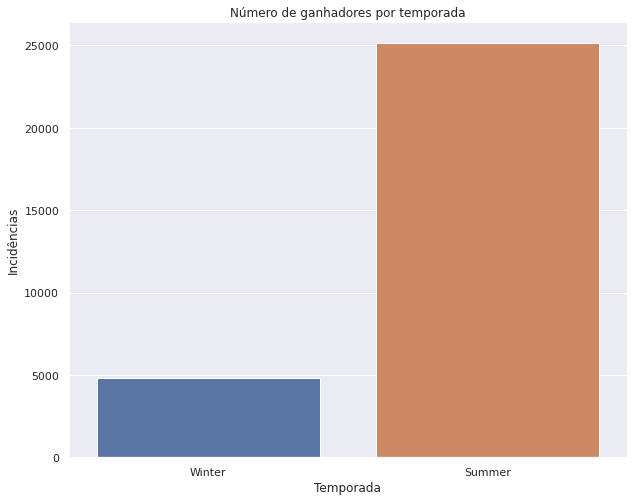

In [32]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid") 
sns.countplot(x=df["Season"])
plt.title("Número de ganhadores por temporada")
plt.xlabel("Temporada")
plt.ylabel("Incidências")
plt.show()

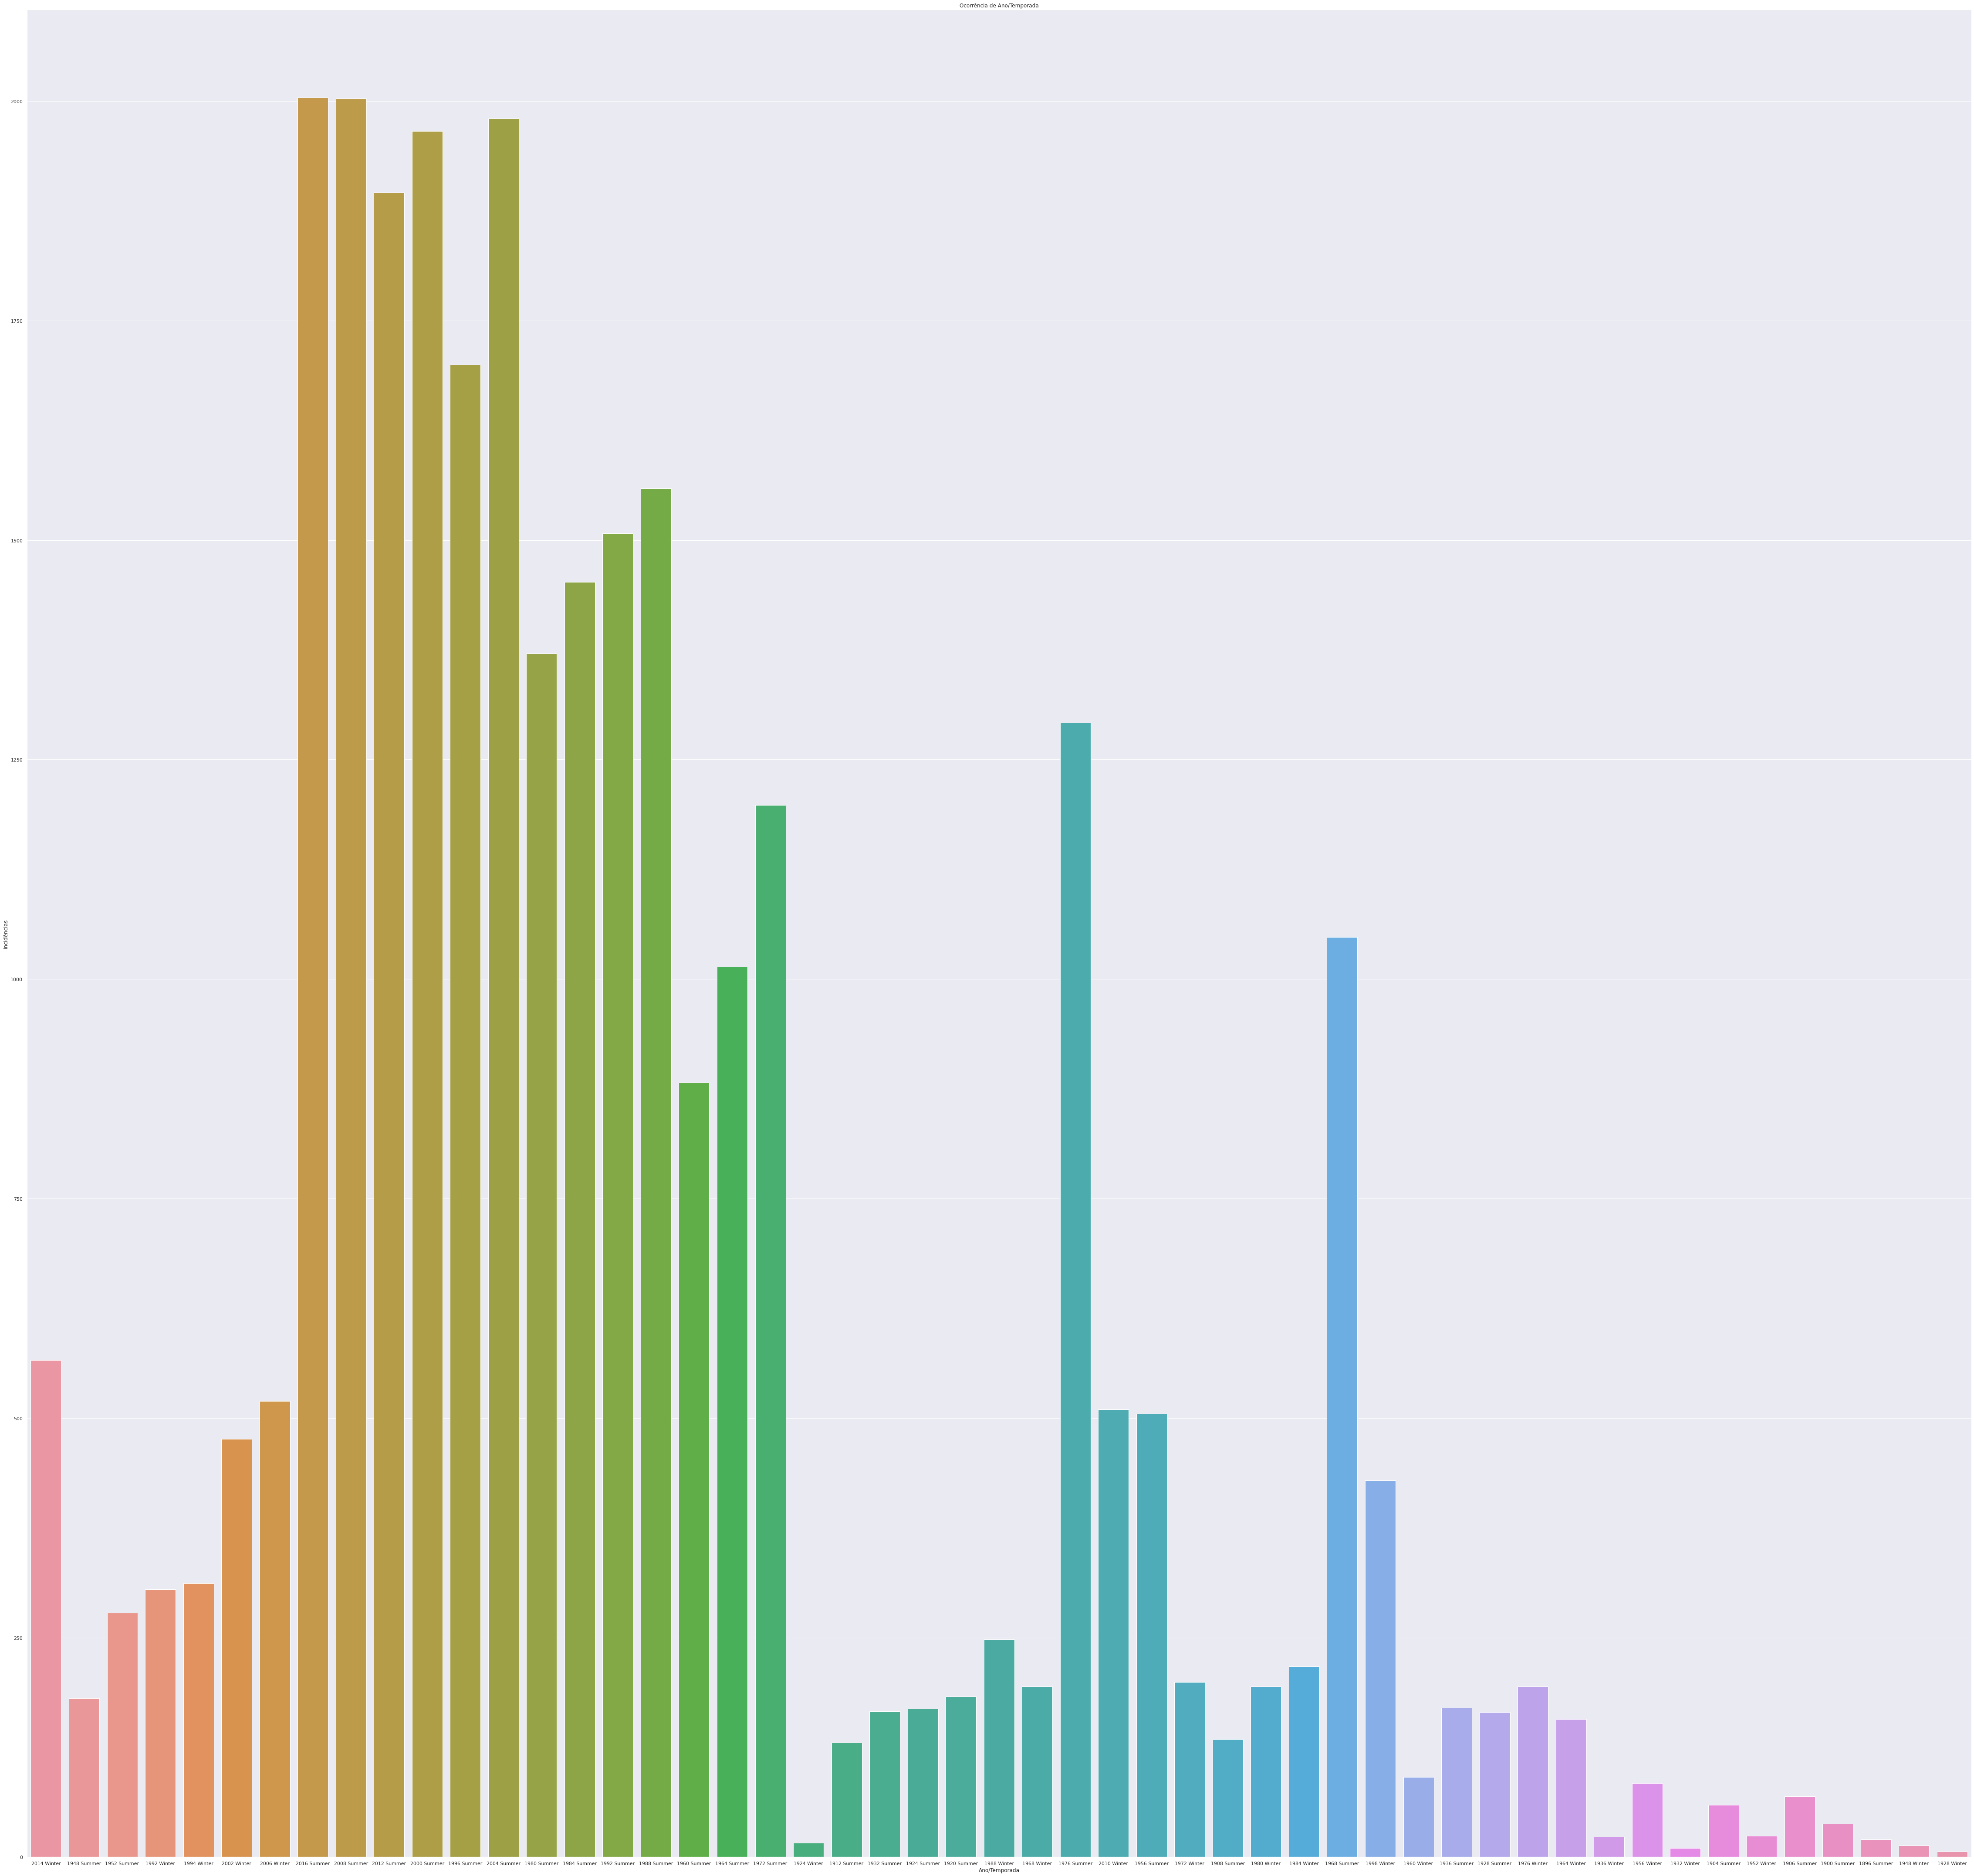

In [33]:
plt.figure(figsize=(80, 78))
sns.set_theme(style="darkgrid") 
sns.countplot(x=df["Games"])
plt.title("Ocorrência de Ano/Temporada")
plt.xlabel("Ano/Temporada")
plt.ylabel("Incidências")
plt.show()

Aperfeiçoando a análise, contudo, ainda outros dados não aparentemente relacionados corroboram o insight aqui tratado, visto que a coluna Year aparentemente nada teria de relação e consolidação desse insght, porém vejamos o Boxplot sobre esse dado abaixo. 

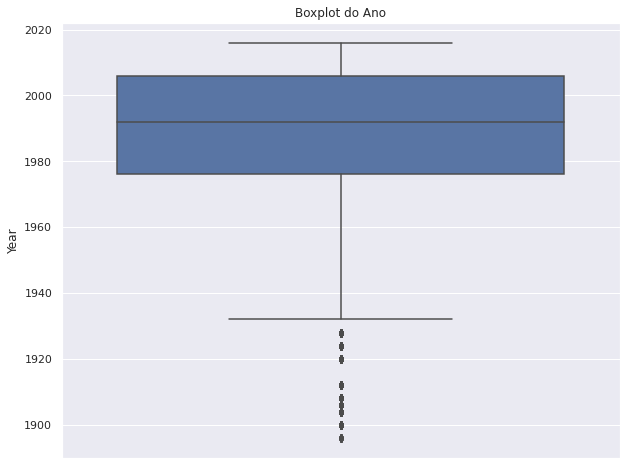

In [34]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df["Year"])
plt.title("Boxplot do Ano")
plt.show()

Percebe-se que, como o segundo quartil (mediana) está posicionado no centro do retângulo, a distribuição dos anos é tida como simétrica (apesar da variância de dados apontar certos outliers), visto que essa linha mediana informa sobre a simetria dos dados.

Para mais, a simetria - então a distribuição - aponta que os anos estão concentrados no intervalo de 1980 e 2008: justamente as maiores barras do gráfico de Games, que são jogos realizados no verão.

Dessa forma, como replica-se que realmente a concentração dos anos é aquela que coincide com os valores em "Games" - que carregam o "Summer" - infere-se o quanto até a análise da distribuição da coluna de anos confirma que os Jogos Olímpicos são tidos frequentemente como de Verão. 

Outrossim, mostra-se ainda como a categoria "City", embora não pareça relacionada, pode também confirmar a noção do insight aqui esboçado, pois a maioria das cidades mais contabilizadas tiveram suas edições das Olimpíadas no verão.

In [61]:
c = df[df["City"] == "######"]
print(c)

Empty DataFrame
Columns: [Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal]
Index: []


In [60]:
df["City"].value_counts()

London                    2186
Athina                    2050
Rio de Janeiro            1986
Beijing                   1977
Sydney                    1944
Atlanta                   1673
Los Angeles               1615
Seoul                     1552
Barcelona                 1497
Moskva                    1359
Montreal                  1281
Munich                    1192
Mexico City               1038
Tokyo                     1008
Roma                       880
Sochi                      558
Torino                     513
Vancouver                  499
Melbourne                  486
Salt Lake City             473
Nagano                     426
Innsbruck                  350
Lillehammer                312
Albertville                305
Helsinki                   277
Calgary                    245
Sarajevo                   211
Paris                      207
Lake Placid                202
Sapporo                    199
Grenoble                   190
Antwerpen                  183
Berlin  

Selecionando, por exemplo, as primeiras mais frequentes, elucida-se, após pesquisas facilmente feitas no Google, que em todas as edições de Londres (1908, 1948 e 2012) os jogos foram tidos como de verão, assim como o que aconteceu com as edições de Atenas (1896 e 2004), além das edições únicas de Atlanta e de Beijing.

Finalmente, depreendendo esse primeiro insight, a recorrência e predominância do verão como categorizador dos Jogos é tanta que até mesmo as edições do Rio de Janeiro e de Sydney - que passaram, respectivamente, no inverno e entre o fim do inverno e o início da primavera -, foram classificados como jogos de verão.

Essa predominãncia de Verão, então, também me fez esboçar a relação dessa coluna com pesos e alturas, como se observa com os códigos abaixo.

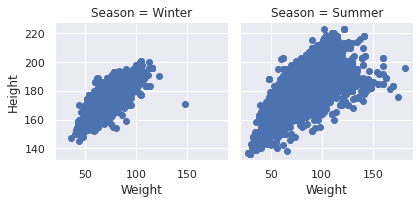

In [36]:
grid = sns.FacetGrid(df, col = "Season")
grid.map(plt.scatter, "Weight", "Height")

Além de mostrar mais uma vez a predominância da estação em questão, porém, a relevância desse insight indica até quanto outros lampejos e intuições podem sair de si.

Observando o gráfico anterior, percebe-se que a predominância/a região central de pontos de altura se dá entre 170 a 180cm e, de peso, está entre 66,5kg e 74,5kg. 

Assim, faço a conta de IMC entre tais intervalos (convertendo a altura de centímetros para metros), conforme as programações abaixo.

In [37]:
altura1 = float(1.7)
peso1 = float(66.5)
IMC1 = float((peso1)/(altura1 ** 2))
altura2 = float(1.8)
peso2 = float(74.5)
IMC2 = float((peso2)/(altura2 ** 2))
IMC_final = (float(IMC1 + IMC2))/2
print(IMC_final)

23.002103891665598


Dessa maneira, sabendo que o IMC fica em torno de 23, demonstro a relevância do insight I, porque a partir de suas noções muitas outras análises surgem.

Duas análises são aqui apresentadas para finalizar esta parte do insight I: 

A primeira é que a dificuldade de, nesse df, relacionar dados numéricos, porque a única percepção é a relação permeada pelo IMC que, com o aumento da altura, o peso tende a aumentar também. 

Dessa maneira, o heatmap é esboçado, apresentando verdadeiramente a não relação lógica e direta entre os dados numéricos, apenas sobre as medidas corporais comentadas.

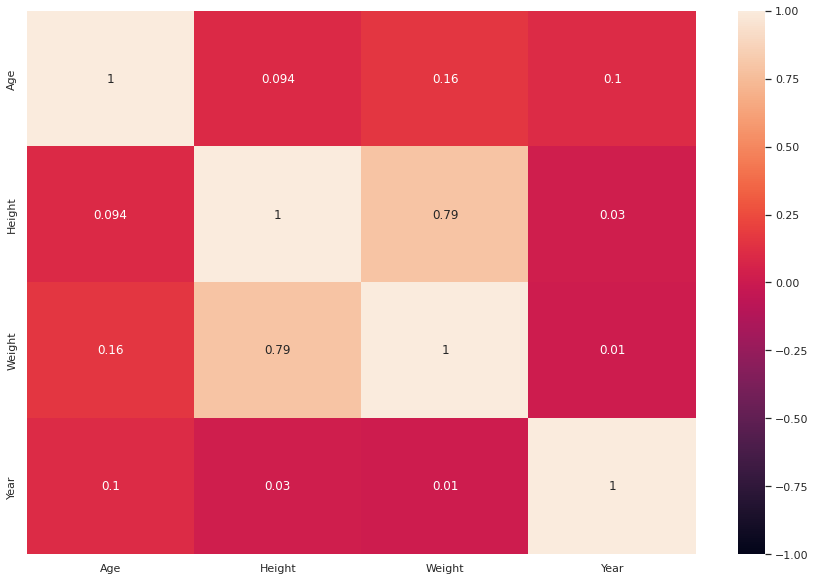

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

A segunda análise originada do insight I é que, ciente de que o IMC médio entre 20 a 29 anos é de 23 (https://www.scielo.br/j/rbce/a/xdpDc8SR9GNzTs9Th5wtqmQ/?format=pdf&lang=pt), concluo que, a partir da percepção das médias de altura x peso aqui oriundas da análise da predominância do Verão, a maioria dos atletas têm tal faixa etária de idade. 

Assim, mais uma vez outras colunas convergem para o tratado desse simples insight, como se comprova a predominância da faixa etária citada no gráfico de Idades abaixo.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


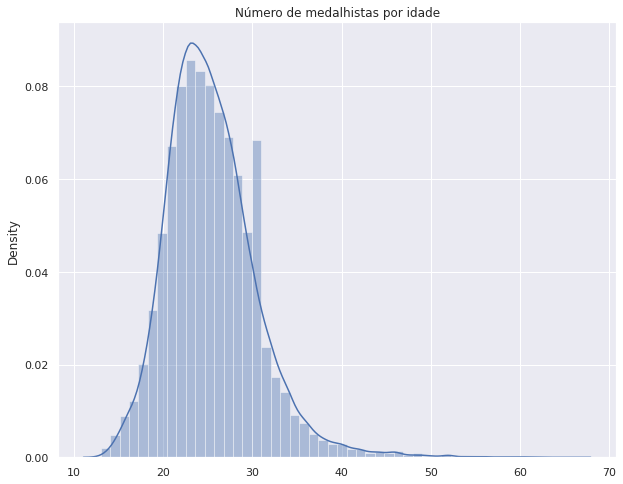

In [39]:
plt.figure(figsize=(10,8))
sns.distplot(x=df["Age"])
plt.title("Número de medalhistas por idade")
plt.show()

**Insight II**

A maior parte dos atletas dos Jogos Olímpicos é do sexo masculino. 

Para verificar essa hipótese, por sua vez, além de só verificar apenas com o gráfico do dado categórico sobre isso (que realmente como indica abaixo aponta a incidiência de 83% dos atletas serem do sexo masculino), outros dados aparentemente não relacionados - as colunas de Sport e Event - ratificam isso.

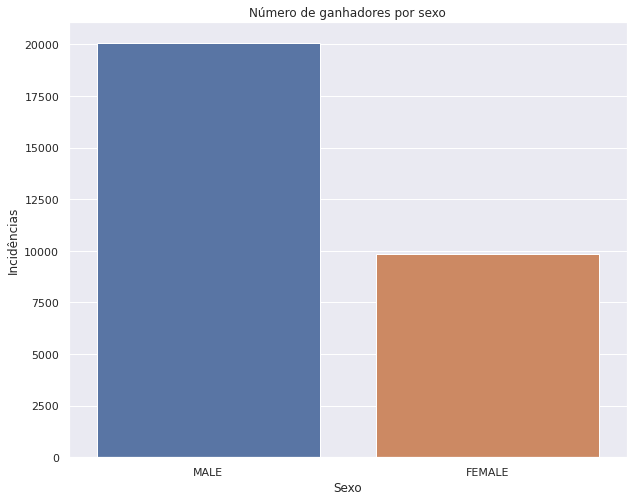

In [40]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid") 
sns.countplot(x = df["Sex"])  #para contar a incidência de gênero
plt.title("Número de ganhadores por sexo")
plt.xlabel("Sexo")
plt.ylabel("Incidências")
plt.show()

Pensando agora na categoria de Evento, a confirmação da predominância masculina se dá pela contagem dos 5 primeiros valores de tal coluna, como se verifica a seguir, porque é bem percepetível que eles remetem a modalidades masculinas. 

In [41]:
df["Event"].value_counts()

Ice Hockey Men's Ice Hockey                                   999
Football Men's Football                                       783
Hockey Men's Hockey                                           711
Basketball Men's Basketball                                   609
Water Polo Men's Water Polo                                   573
                                                             ... 
Swimming Men's 220 yard Freestyle                               1
Wrestling Men's Unlimited Class, Greco-Roman                    1
Swimming Men's One Mile Freestyle                               1
Art Competitions Mixed Architecture, Architectural Designs      1
Equestrianism Men's Dressage, Team                              1
Name: Event, Length: 563, dtype: int64

Ainda, pensando em Evento, traça-se a relação dessa coluna com a de Esporte: movimento que indica a relevância do insight por desencadear essas inter-relações.

Nessa inter-relação, então, vê-se que a maior incidência de Esporte é Atletismo e Natação, os quais, quando filtrados em Evento, explicitam a grande maioria ser de categorias masculinas, como os códigos sequenciados imprimem.

Dessa maneira, reitero o insight II, englobando e relacionando dados além do previsível dado pelo gráfico de Sexo.

In [42]:
df["Sport"].value_counts()

Athletics                    3621
Swimming                     2457
Rowing                       2079
Ice Hockey                   1298
Hockey                       1152
Gymnastics                   1147
Fencing                      1108
Football                     1081
Canoeing                     1026
Basketball                    991
Wrestling                     965
Volleyball                    950
Handball                      927
Cycling                       840
Water Polo                    764
Boxing                        705
Sailing                       677
Cross Country Skiing          674
Equestrianism                 658
Shooting                      541
Weightlifting                 530
Judo                          526
Speed Skating                 467
Biathlon                      388
Alpine Skiing                 351
Baseball                      332
Diving                        318
Bobsleigh                     282
Short Track Speed Skating     268
Figure Skating

In [43]:
ath = df[df['Sport'] == "Athletics"]
print(ath.Event.unique())


["Athletics Women's Javelin Throw" "Athletics Men's 1,500 metres"
 "Athletics Men's Hammer Throw" "Athletics Men's Marathon"
 "Athletics Men's Long Jump" "Athletics Men's Triple Jump"
 "Athletics Women's 5,000 metres" "Athletics Men's 4 x 400 metres Relay"
 "Athletics Men's 100 metres" "Athletics Men's 4 x 100 metres Relay"
 "Athletics Men's Standing High Jump" "Athletics Men's Standing Long Jump"
 "Athletics Women's Shot Put" "Athletics Men's 400 metres Hurdles"
 "Athletics Women's 4 x 400 metres Relay" "Athletics Women's Long Jump"
 "Athletics Women's 4 x 100 metres Relay" "Athletics Men's High Jump"
 "Athletics Men's Discus Throw" "Athletics Women's 100 metres Hurdles"
 "Athletics Men's Cross-Country, Team"
 "Athletics Men's 10 kilometres Walk" "Athletics Women's 400 metres"
 "Athletics Men's 800 metres" "Athletics Men's 3,000 metres Steeplechase"
 "Athletics Women's Marathon" "Athletics Men's 110 metres Hurdles"
 "Athletics Men's Cross-Country, Individual" "Athletics Men's Shot Put

In [44]:
ath1 = df[df["Sport"] == "Swimming"]
print(ath1.Event.unique())

["Swimming Women's 4 x 100 metres Medley Relay"
 "Swimming Men's 4 x 100 metres Freestyle Relay"
 "Swimming Men's 4 x 200 metres Freestyle Relay"
 "Swimming Men's 4 x 100 metres Medley Relay"
 "Swimming Women's 800 metres Freestyle"
 "Swimming Men's 100 metres Freestyle"
 "Swimming Men's 50 metres Freestyle"
 "Swimming Men's 200 metres Freestyle"
 "Swimming Women's 4 x 100 metres Freestyle Relay"
 "Swimming Women's 100 metres Butterfly"
 "Swimming Women's 50 metres Freestyle"
 "Swimming Women's 100 metres Freestyle"
 "Swimming Women's 4 x 200 metres Freestyle Relay"
 "Swimming Women's 10 kilometres Open Water"
 "Swimming Women's 100 metres Backstroke"
 "Swimming Women's 100 metres Breaststroke"
 "Swimming Men's 400 metres Freestyle"
 "Swimming Men's 100 metres Butterfly"
 "Swimming Women's 200 metres Backstroke"
 "Swimming Women's 200 metres Breaststroke"
 "Swimming Women's 200 metres Freestyle"
 "Swimming Women's 400 metres Freestyle"
 "Swimming Men's 200 metres Butterfly"
 "Swimming 

**Insight III**

O país com a maior quantidade de medalhas é Estados Unidos.

Finalizando essa última hipótese, como comentado e mostrando o aperfeiçoamento dos gráficos, um gráfico um pouco mais complexo é desenvolvido (mas limitando para os países nas 30 primeiras posições). Ressalto, porém, que aqui a coluna representada por NOC (Comitê Olímpico Nacional) não foi utilizada, pois a representação por Time (então pela coluna Team) acabou por englobar essa informação.

Além disso, sobre o aperfeiçoamento do gráfico, até mesmo uma paleta específica é criada anteriormente. Vejamos, enfim, os códidgos abaixo:

In [45]:
medals_colors = {"Gold": "gold", "Silver": "silver", "Bronze": "orange"}

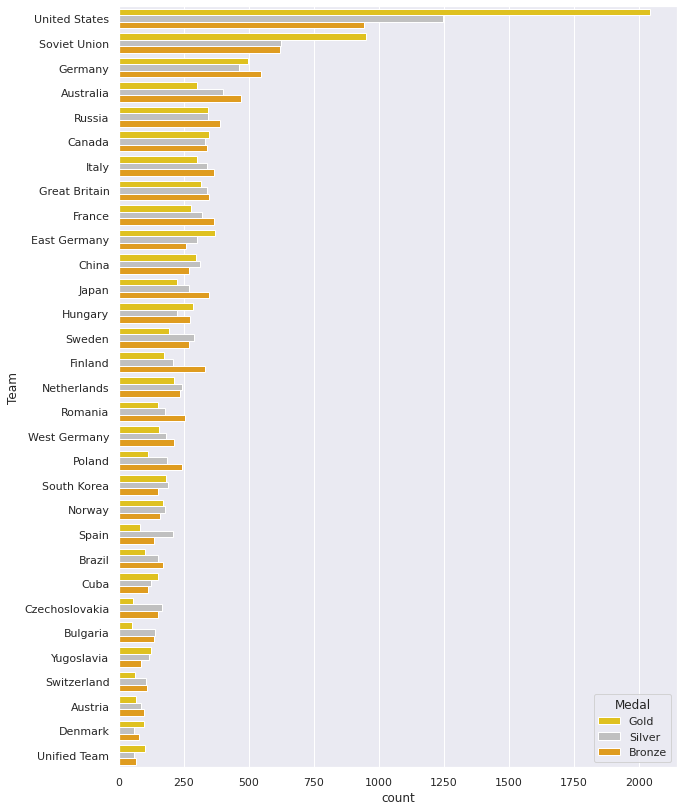

In [46]:
plt.figure(figsize = (10,14))
medals_order = ["Gold","Silver","Bronze"]
sns.countplot (y = "Team", hue = "Medal", data = df, order = df["Team"].value_counts().index, hue_order = medals_order, palette = medals_colors)
plt.ylim(30.5)
plt.show()

No gráfico anterior, relamente confirma-se o insight de que o país com a maior quantidade de medalhas é o Estados Unidos, bem também como a moda da coluna de Nome ratifica essa informação.

In [47]:
df["Name"].value_counts()

Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Borys Anfiyanovych Shakhlin           13
Ole Einar Bjrndalen                   13
                                      ..
Kaori Inoue                            1
Vincent Joseph "Vince" Boryla          1
Milutin oki                            1
Inder "Gogi" Singh                     1
Margot Elizabeth Foster                1
Name: Name, Length: 20618, dtype: int64

Relevante, todavia, enfatizar que os outros 4 nomes mais frequentes não são estadounidenses. Assim, demonstra-se novamente a importância dos insights aqui tratados, porque eles acabam gerando e possibilitando diversas outras análises: as quais aqui não serão mais tão descritas - por eu não buscar temáticas específicas -, mas enaltecidas que, a depender das temáticas, elas podem ser muito reutilizadas e usadas como bases para diversas outras explicações.

##CONCLUSÃO: 

Neste pequeno projeto, aprendi e desenvoli habilidades de limpeza e análise de um DataFrame.

No df em questão, salientei apenas 3 insights, que, contudo, mostraram-se relevantes por servirem como guias para diversas outras análises, além de permitirem inter-relacionar todas as colunas dos dados. 

Ainda, proporcionalmente que os insights foram progredindo, busquei aperfeiçoar os gráficos e as análises, assim tentando explicitar desde certa simetria à variância de dados, usando boxplot, como também indicando correlações mais óbvias e impossibilitadas, pela escassez de colunas numéricas, como verificou-se com o heatmap. 

Em suma, busquei diversificar e explorar os gráficos, explicando o dataset e mostrando métricas interessantes, as quais, mesmo que não muito discorridas pela ausência de temas específicos, indicaram a relevância dos insights e da Limpeza e Análise de Dados.